# 2. Importing Library

In [1]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [2]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('XLM-USD.csv')

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1969
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(1969, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.033792,0.040380,0.033744,0.039946,0.039946,32813200
1,2017-11-10,0.039833,0.039833,0.031366,0.033073,0.033073,32634200
2,2017-11-11,0.033083,0.035829,0.031881,0.033053,0.033053,17914400
3,2017-11-12,0.032965,0.033334,0.027469,0.028182,0.028182,17002300
4,2017-11-13,0.028115,0.031968,0.028041,0.030656,0.030656,11245700


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1964,2023-03-27,0.091961,0.094903,0.090037,0.092599,0.092599,102659135
1965,2023-03-28,0.092597,0.098019,0.091191,0.097714,0.097714,125708243
1966,2023-03-29,0.097713,0.107185,0.097700,0.101889,0.101889,194182902
1967,2023-03-30,0.101888,0.106705,0.100447,0.106269,0.106269,168548645
1968,2023-03-31,0.106145,0.112519,0.105336,0.109094,0.109094,201512080


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1969 non-null   object 
 1   Open       1969 non-null   float64
 2   High       1969 non-null   float64
 3   Low        1969 non-null   float64
 4   Close      1969 non-null   float64
 5   Adj Close  1969 non-null   float64
 6   Volume     1969 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.8+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03
mean,0.186016,0.194447,0.177049,0.186036,0.186036,4.248157e+08
std,0.134849,0.144128,0.124918,0.134810,0.134810,6.895185e+08
min,0.028115,0.031968,0.027469,0.028182,0.028182,6.979350e+06
25%,0.083537,0.085610,0.081665,0.083580,0.083580,1.007915e+08
50%,0.123830,0.127659,0.119732,0.123813,0.123813,2.168310e+08
75%,0.260759,0.272314,0.250979,0.261192,0.261192,4.624099e+08
max,0.892399,0.938144,0.677496,0.896227,0.896227,1.040858e+10


# Checking for Null Values

In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [11]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(1969, 7)

In [12]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-11-09,0.033792,0.040380,0.033744,0.039946
1,2017-11-10,0.039833,0.039833,0.031366,0.033073
2,2017-11-11,0.033083,0.035829,0.031881,0.033053
3,2017-11-12,0.032965,0.033334,0.027469,0.028182
4,2017-11-13,0.028115,0.031968,0.028041,0.030656
...,...,...,...,...,...
1963,2023-03-26,0.090761,0.092510,0.090672,0.091962
1964,2023-03-27,0.091961,0.094903,0.090037,0.092599
1965,2023-03-28,0.092597,0.098019,0.091191,0.097714
1966,2023-03-29,0.097713,0.107185,0.097700,0.101889


In [13]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,0.222123,0.223622
February,0.212596,0.211965
March,0.184722,0.184312
April,0.234601,0.236562
May,0.243732,0.242206
June,0.177979,0.176127
July,0.158180,0.158904
August,0.171034,0.170677
September,0.159061,0.158927


In [14]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1969, 2)


In [16]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [17]:
closedf = closedf[closedf['Date'] > '2021-11-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  515


In [18]:
closedf

,Date,Close
1454,2021-11-02,0.381820
1455,2021-11-03,0.384967
1456,2021-11-04,0.369684
1457,2021-11-05,0.359996
1458,2021-11-06,0.359171
...,...,...
1964,2023-03-27,0.092599
1965,2023-03-28,0.097714
1966,2023-03-29,0.101889
1967,2023-03-30,0.106269


In [19]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [20]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(515, 1)


* ### Slicing data into Training set and Testing set

In [21]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (309, 1)
test_data:  (206, 1)


In [22]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (293, 15)
y_train:  (293,)
X_test:  (190, 15)
y_test (190,)


In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (293, 15, 1)
X_test:  (190, 15, 1)


* # Actuall Model Building

In [25]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 41ms/step - loss: 0.1772 - val_loss: 0.0034
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.1338 - val_loss: 0.0016
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0960 - val_loss: 0.0013
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0659 - val_loss: 0.0025
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0395 - val_loss: 0.0055
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0181 - val_loss: 0.0101
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0140
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0129
Epoch 9/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0090
Epoch 10/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0083
Epoch 11

- ### Plotting Loss vs Validation loss 

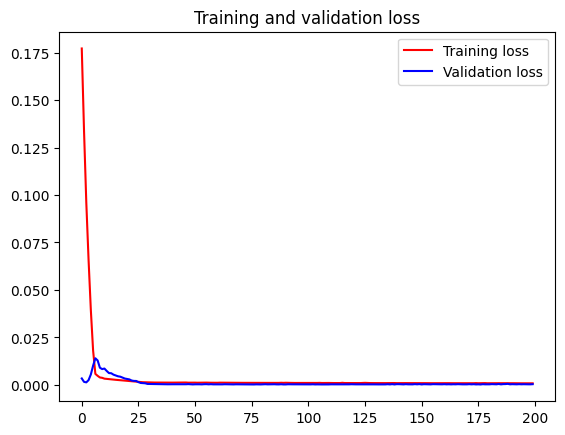

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 2ms/step


((293, 1), (190, 1))

- # Model Evaluation

In [29]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [30]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.009751474446973912
Train data MSE:  9.509125388998517e-05
Train data MAE:  0.007116330626300578
-------------------------------------------------------------------------------------
Test data RMSE:  0.006688737065941531
Test data MSE:  4.473920353730012e-05
Test data MAE:  0.005749036903730193


- ## Variance Regression Score

In [31]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9793005594109357
Test data explained variance regression score: 0.9029960756343349


- ## R square score for regression

In [32]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.979102768939085
Test data R2 score: 0.7705188749188261


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [33]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0026759609561851703
Test data MGD:  0.005397283777862795
----------------------------------------------------------------------
Train data MPD:  0.00047853880064565
Test data MPD:  0.000488436507087915


In [34]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (515, 1)
Test predicted data:  (515, 1)


- # Predicting next 30 days

In [35]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [36]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.11232976615428925]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [37]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("xlm.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [38]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()